# importing libraries

In [ ]:
import cv2 #for resizing images
import numpy as np 
import os #for opening images from folders
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg #for reading images
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from tensorflow.keras.models import Sequential ,load_model
from tensorflow.keras.callbacks import History # for calculating AUC
import random
import pickle #for saving files
from sklearn.metrics import classification_report ,confusion_matrix , roc_curve, auc
from tensorflow.keras.optimizers import RMSprop


%matplotlib inline

dictionary for indicating man & woman

In [ ]:
 class_index ={'man':0 , 'woman':1}

# Get Images function

In [ ]:
def GetImages(array,path,begin,end,gender):
    images_array=array
    sub_imgs = os.listdir(path)
    sub_imgs =sub_imgs[begin:end]

    for index in sub_imgs: # go through men folder
        try:
           new_path = os.path.join(path,index) # getting path of img
           #print(new_path)
           img = mpimg.imread(new_path) #read img
      
           if img.shape!=(100,100,3):
              new_img = cv2.resize(img,(100,100)) # resize img to (100,100)
              images_array.append([new_img,class_index[gender]]) # pushing img
           else :
              images_array.append([img,class_index[gender]]) # pushing img              
        
        except Exception as e:
           pass
    print(f'{len(images_array)} were add successfully')
    return images_array

# shuffle function

In [ ]:
def Shuffle(array):
    random.shuffle(array)

# Plotting function

In [ ]:
def Plot(array):
    plt.figure(figsize=(10,10))#10 cm* 10 cm
    for i in range(25): #25 image
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        indx = random.randint(0,len(array)) #get random number between 0 and 4000
        plt.imshow(array[indx][0])
        name = array[indx][1]
        plt.xlabel(list(class_index.keys())[list(class_index.values()).index(name)]) #get name of selected image

# Seperate function

In [ ]:
def Seperate(X,y,array):
    for feature,label in array:
        X.append(feature)
        y.append(label)

    X= np.array(X).reshape(-1,100,100,3)
    y= np.array(y).reshape(-1,1)

    return X,y

# save function

In [ ]:
def Save(path,data):
    pickle_out=open(path,'wb') #path will file will be saved to
    pickle.dump(data,pickle_out) #saving data to file
    pickle_out.close()

# Upload function

In [ ]:
def Load(path):   
    pickle_in=open(path,'rb')
    return pickle.load(pickle_in)

# ".استعد للنجاح وستحققه"

# showing number of images in men & women

In [ ]:
man_path='/content/drive/MyDrive/man'
men_imgs = os.listdir(man_path) #taking all images from men folder
print(f'number of men imgs : {len(men_imgs)}')

woman_path='/content/drive/MyDrive/woman'
women_imgs = os.listdir(woman_path) #taking all images from women folder
print(f'number of women imgs : {len(women_imgs)}')

number of men imgs : 10183
number of women imgs : 9485


# preprocessing pipline


1-delete all images which are not in their right category

2- resize all imgs which have size upove & under 100x100 cm^2 to 100x100

3-give labels to data

4-seperate labels from features 

5-save all preprocessing

# start with training samples

first take 2500 image from men folder

In [ ]:
training_data = [] # images will be pushed in this array

path='/content/drive/MyDrive/man'

gender='man'

training_data=GetImages(training_data,path,0,2500,gender)

2500 were add successfully


Done uploading 2500 of men 

Now uploading 2500 women

In [ ]:
path='/content/drive/MyDrive/woman'

gender='woman'

training_data=GetImages(training_data,path,0,2500,gender)

5000 were add successfully


Now we have 5000 sample for training

# changing the order 
Of training images

In [ ]:
Shuffle(training_data)

for sample in training_data[:20]: #print fist 20 sample
    print(sample[1])

0
0
0
1
0
1
0
1
0
0
0
1
1
0
1
1
1
0
0
1


# plotting some random training images

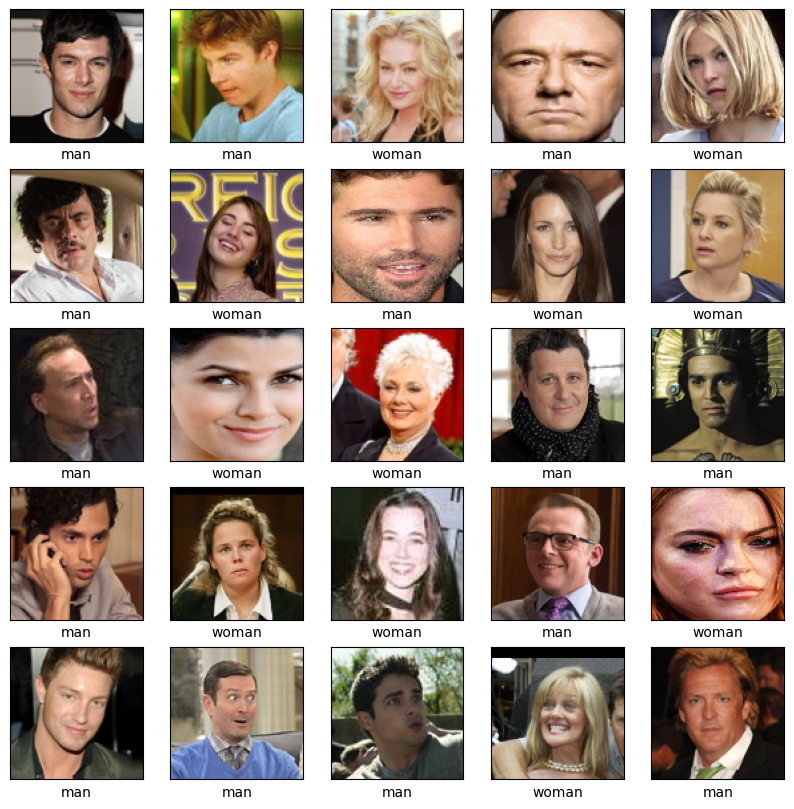

In [ ]:
Plot(training_data)

# separate features from labels
in training data

In [ ]:
X_train=[] # for features 
y_train=[] # for labels

X_train,y_train =Seperate(X_train,y_train,training_data)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(5000, 100, 100, 3)
(5000, 1)


# save X_train & y_train

In [ ]:
X_train_path='/content/drive/MyDrive/X_train'
Save(X_train_path,X_train)

y_train_path='/content/drive/MyDrive/y_train'
Save(y_train_path,y_train)

# load X_train & y_train

In [ ]:
X_train_path='/content/drive/MyDrive/X_train'
X_train=Load(X_train_path)

y_train_path='/content/drive/MyDrive/y_train'
y_train=Load(y_train_path)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(5000, 100, 100, 3)
(5000, 1)


#  ".لا تنتظر الفرصة، ابحث عنها واصنعها"

# testing images

In [ ]:
testing_data = []

path='/content/drive/MyDrive/man'

gender='man'

testing_data=GetImages(testing_data,path,2100,3600,gender)

1500 were add successfully


Done uploading 1500 of men 

Now uploading 1500 women

In [ ]:
path='/content/drive/MyDrive/woman'

gender='woman'

testing_data=GetImages(testing_data,path,2100,3600,gender)

3000 were add successfully


# Shuffling imgs
in test data

In [ ]:
random.shuffle(testing_data)
for sample in testing_data[:20]:
    print(sample[1])

1
1
1
0
1
1
0
1
1
1
1
0
0
1
0
0
0
0
0
1


# Plotting some random imgs

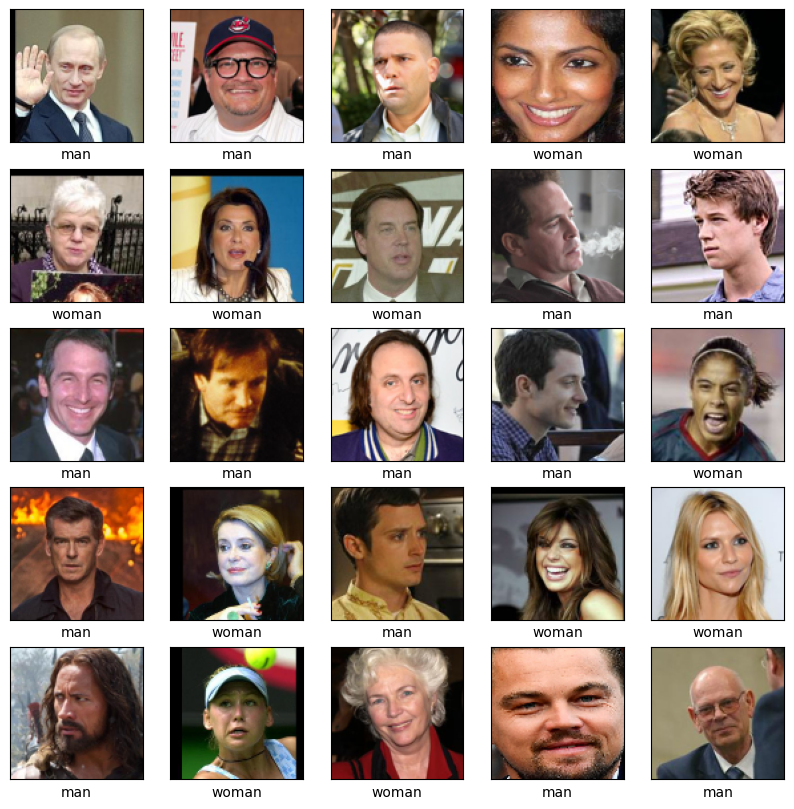

In [ ]:
Plot(testing_data)

# Separate the imgs to X_test & y_test

In [ ]:
X_test=[]
y_test=[]

X_test,y_test=Seperate(X_test,y_test,testing_data)

In [ ]:
print(X_test.shape)
print(y_test.shape)

(3000, 100, 100, 3)
(3000, 1)


# save X_test & y_test

In [ ]:
X_test_path='/content/drive/MyDrive/X_test'

y_test_path='/content/drive/MyDrive/y_test'


Save(X_test_path,X_test)
Save(y_test_path,y_test)

# load X_test & y_test

In [ ]:
X_test_path='/content/drive/MyDrive/X_test'

y_test_path='/content/drive/MyDrive/y_test'


X_test=Load(X_test_path)
y_test=Load(y_test_path)

In [ ]:
print(X_test.shape)
print(y_test.shape)

(3000, 100, 100, 3)
(3000, 1)


# ".لا شيء مستحيل، فقط قم بالعمل الجاد والتفاني وستحقق ما تريد"

# time for 1000 imges for predict

In [ ]:
predict_data = []

path='/content/drive/MyDrive/man'

gender ='man'

predict_data=GetImages(predict_data,path,4000,4500,gender)

500 were add successfully


done uploading 500 men imges for predictions

now 500 for women

In [ ]:
path='/content/drive/MyDrive/woman'

gender ='woman'

predict_data=GetImages(predict_data,path,4000,4500,gender)

1000 were add successfully


now we have down with 1000 imgs for predictions

# shuffling imges

In [ ]:
Shuffle(predict_data)
for sample in predict_data[:20]:
    print(sample[1])

0
0
0
0
1
1
0
0
1
1
1
0
1
0
0
0
1
1
0
0


# ploting imges

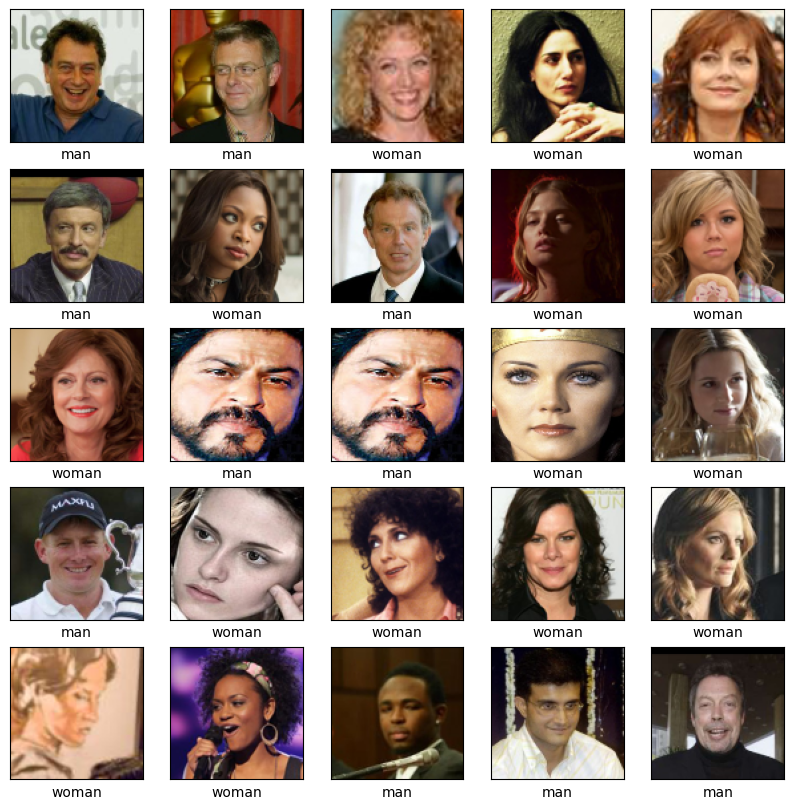

In [ ]:
Plot(predict_data)

# seperate to X_predict & y_predict

In [ ]:
X_predict =[]
y_predict = []

X_predict ,y_predict =Seperate(X_predict ,y_predict,predict_data)

In [ ]:
print(X_predict.shape)
print(y_predict.shape)

(1000, 100, 100, 3)
(1000, 1)


# save X_predict & y_predict

In [ ]:
X_predict_path='/content/drive/MyDrive/X_predict'
y_predict_path='/content/drive/MyDrive/y_predict'

Save(X_predict_path,X_predict)
Save(y_predict_path,y_predict)

# load X_predict & y_predict

In [ ]:
X_predict_path='/content/drive/MyDrive/X_predict'
y_predict_path='/content/drive/MyDrive/y_predict'

X_predict=Load(X_predict_path)
y_predict=Load(y_predict_path)

In [ ]:
print(X_predict.shape)
print(y_predict.shape)

(1000, 100, 100, 3)
(1000, 1)


# "لا تترك لشخص آخر سيطرة على حياتك، فأنت المسؤول الوحيد عن سعادتك ونجاحك"

# building model

In [ ]:
model=Sequential([
Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)),
MaxPooling2D((2,2)),

Conv2D(64,(3,3),activation='relu'),
MaxPooling2D((2,2)),

Conv2D(128,(3,3),activation='relu'),

Flatten(),
Dense(64,activation='relu'),
Dense(32,activation='relu'),Dropout(rate=0.25),
Dense(2,activation='softmax'),
])

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])

In [ ]:
histroy=model.fit(X_train,y_train,epochs =20,validation_data=(X_test,y_test),batch_size=128,verbose=1)

Epoch 1/20
40/40 [==============================] - 16s 85ms/step - loss: 1.8854 - accuracy: 0.6906 - val_loss: 1.0221 - val_accuracy: 0.7600
Epoch 2/20
40/40 [==============================] - 2s 55ms/step - loss: 0.4586 - accuracy: 0.8296 - val_loss: 0.5559 - val_accuracy: 0.7600
Epoch 3/20
40/40 [==============================] - 2s 49ms/step - loss: 0.4145 - accuracy: 0.8316 - val_loss: 0.7108 - val_accuracy: 0.7610
Epoch 4/20
40/40 [==============================] - 2s 48ms/step - loss: 0.3812 - accuracy: 0.8382 - val_loss: 0.5215 - val_accuracy: 0.7990
Epoch 5/20
40/40 [==============================] - 2s 55ms/step - loss: 0.3459 - accuracy: 0.8482 - val_loss: 0.5306 - val_accuracy: 0.8000
Epoch 6/20
40/40 [==============================] - 2s 59ms/step - loss: 0.3201 - accuracy: 0.8608 - val_loss: 0.4947 - val_accuracy: 0.8280
Epoch 7/20
40/40 [==============================] - 2s 51ms/step - loss: 0.2915 - accuracy: 0.8858 - val_loss: 0.6324 - val_accuracy: 0.8270
Epoch 8/20
4

In [ ]:
loss,acc=model.evaluate(X_test,y_test)
print(f'accuracy = {acc}')
print(f'loss = {loss}')

94/94 [==============================] - 1s 6ms/step - loss: 1.5921 - accuracy: 0.8413
accuracy = 0.8413333296775818
loss = 1.592058539390564


Saving model

In [ ]:
model.save('/content/drive/MyDrive/adam_model')

Loading model

In [ ]:
# Load the saved model from disk
model = load_model('/content/drive/MyDrive/adam_model')

# prediction

Prediction for testing

In [ ]:
Test_predictions=model.predict(X_test)

94/94 [==============================] - 1s 5ms/step


Unseen_Predictions

In [ ]:
Unseen_predictions =model.predict(X_predict)

32/32 [==============================] - 0s 5ms/step


# wrong predictions

See how many samples were wrongly predicted from test & unseen data

In [ ]:
Wrong_predict=0
for I in range(3000):
    if np.argmax(Test_predictions[I])!=y_test[I]:
         print(I)
         Wrong_predict+=1

print('-----------------')
print(f'total number of faild test_predictions : {Wrong_predict}' )

5
8
19
24
26
31
42
45
46
53
66
74
85
89
95
110
115
116
134
135
146
162
165
169
173
177
194
200
207
211
221
239
243
246
257
267
276
277
282
285
303
308
315
316
322
323
326
328
339
343
350
356
357
360
362
364
366
371
374
375
385
391
395
401
413
429
435
441
451
455
456
457
463
467
472
475
483
485
489
496
497
499
503
504
515
519
522
532
533
537
540
554
563
570
573
574
588
595
604
617
619
635
644
659
660
662
668
671
677
693
695
699
711
716
730
732
745
746
748
749
750
751
755
762
765
768
769
776
778
785
810
811
822
836
846
857
859
861
863
864
865
872
878
900
907
913
926
938
941
944
947
957
974
977
978
979
992
994
995
1001
1021
1028
1029
1030
1032
1038
1039
1052
1056
1058
1062
1075
1076
1077
1085
1094
1105
1110
1113
1115
1118
1122
1133
1135
1164
1167
1175
1180
1208
1211
1220
1221
1223
1232
1243
1254
1256
1257
1258
1261
1270
1283
1287
1288
1289
1291
1292
1293
1301
1302
1309
1328
1329
1330
1334
1335
1346
1352
1360
1366
1367
1370
1373
1380
1382
1397
1398
1400
1401
1408
1411
1417
1426
1427
1430
1

See how many samples were wrongly predicted from test

In [ ]:
Wrong_predict=0
for I in range(1000):
    if np.argmax(Unseen_predictions[I])!=y_predict[I]:
         print(I)
         Wrong_predict+=1

print ('----------')
print(f'total number of faild unseen_predictions : {Wrong_predict}' )

0
1
2
3
4
6
7
8
10
11
12
14
18
20
21
22
23
25
30
33
35
37
38
43
45
46
48
50
52
53
54
58
59
61
66
67
68
71
72
73
75
76
77
78
79
80
82
83
84
85
86
87
88
89
91
92
94
98
102
103
104
108
109
112
113
116
117
118
120
122
123
124
125
126
127
129
131
133
137
141
142
144
145
146
147
148
151
154
156
157
158
160
161
163
166
169
171
173
176
177
178
180
182
184
185
186
187
189
192
193
197
199
200
204
207
209
211
214
219
220
223
224
226
231
234
240
241
242
243
249
251
252
258
259
261
263
266
270
271
273
274
279
280
281
284
287
289
291
293
294
295
296
298
299
301
302
304
305
306
307
308
309
311
313
314
315
316
318
319
320
324
325
327
330
331
332
333
334
335
339
340
341
344
346
349
350
351
353
355
358
359
360
364
365
368
369
370
371
374
375
377
382
384
385
389
390
391
393
395
399
400
402
405
412
413
415
416
417
421
423
425
427
429
430
432
433
435
436
437
439
441
443
444
446
449
450
452
454
455
458
460
462
463
464
467
468
472
473
474
476
477
479
483
485
486
488
490
491
492
493
497
499
502
505
506
509
51

# plotting some of test predictions

In [ ]:
def plot_img (i,predictions_array,true_lbl,img):
    predictions_array,true_lbl,img=predictions_array[i],true_lbl[i][0],img[i]
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)
    prediction_lbl=np.argmax(predictions_array)
    if prediction_lbl == true_lbl:
       color='blue'
    else:
       color='red'

    detected=list(class_index.keys())[list(class_index.values()).index(prediction_lbl)]
    actual=list(class_index.keys())[list(class_index.values()).index(true_lbl)]

    plt.xlabel('{} {:2.0f}% {}'.format(detected,100*np.max(predictions_array),actual),color=color)

In [ ]:
def plot_value (i,predictions_array,true_lbl):
    predictions_array,true_lbl=predictions_array[i],true_lbl[i][0]
    plt.xticks([])
    plt.yticks([])
    thisplot=plt.bar(range(2),predictions_array,color='#777777')
    plt.ylim([0,1])
    prediction_lbl=np.argmax(predictions_array)
    thisplot[prediction_lbl].set_color('red')
    thisplot[true_lbl].set_color('blue')
    str=f'predicted = {np.argmax(predictions_array)} true = {true_lbl}'
    plt.xlabel(str)

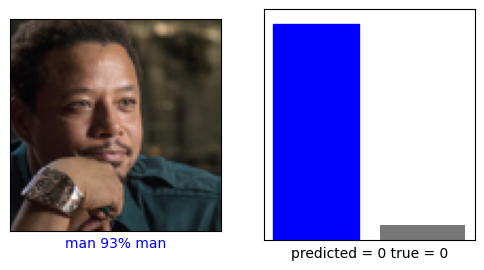

In [ ]:
i=3
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_img(i,Test_predictions,y_test,X_test)
plt.subplot(1,2,2)
plot_value(i,Test_predictions,y_test)
plt.show()

# plotting some of unseen predictions

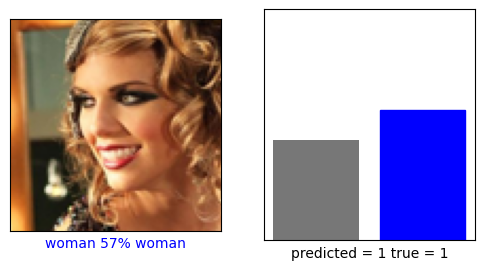

In [ ]:
i=278
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_img(i,Unseen_predictions,y_predict,X_predict)
plt.subplot(1,2,2)
plot_value(i,Unseen_predictions,y_predict)
plt.show()

# classification report , conclusion matrix

For test_prediction

In [ ]:
predicted_array=np.argmax(Test_predictions,axis=-1)
predicted_array

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
print(classification_report(y_test,predicted_array,target_names=class_index,digits=4))  
print('---------------------------------------------')
print(confusion_matrix(y_test,predicted_array))

              precision    recall  f1-score   support

         man     0.8759    0.7953    0.8337      1500
       woman     0.8126    0.8873    0.8483      1500

    accuracy                         0.8413      3000
   macro avg     0.8442    0.8413    0.8410      3000
weighted avg     0.8442    0.8413    0.8410      3000

---------------------------------------------
[[1193  307]
 [ 169 1331]]


For unseen prediction

In [ ]:
predicted_array=np.argmax(Unseen_predictions,axis=-1)

In [ ]:
print(classification_report(y_predict,predicted_array,target_names=class_index,digits=4))  
print('---------------------------------------------')
print(confusion_matrix(y_predict,predicted_array))

              precision    recall  f1-score   support

         man     0.4572    0.3740    0.4114       500
       woman     0.4704    0.5560    0.5096       500

    accuracy                         0.4650      1000
   macro avg     0.4638    0.4650    0.4605      1000
weighted avg     0.4638    0.4650    0.4605      1000

---------------------------------------------
[[187 313]
 [222 278]]


# plotting graph between the training and validation accuracy and loss

In [ ]:
# Define a function to plot the training and validation metrics
def plot_history(history: History):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

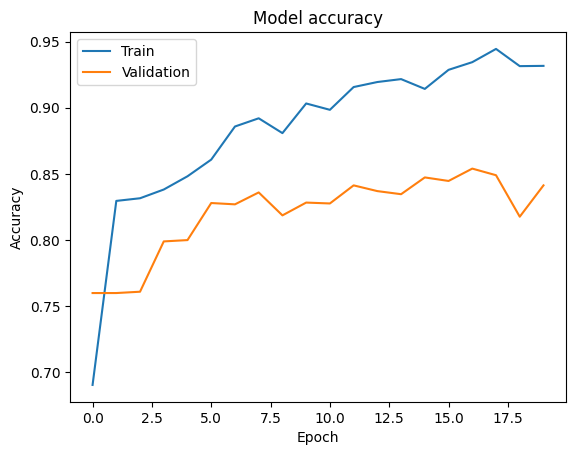

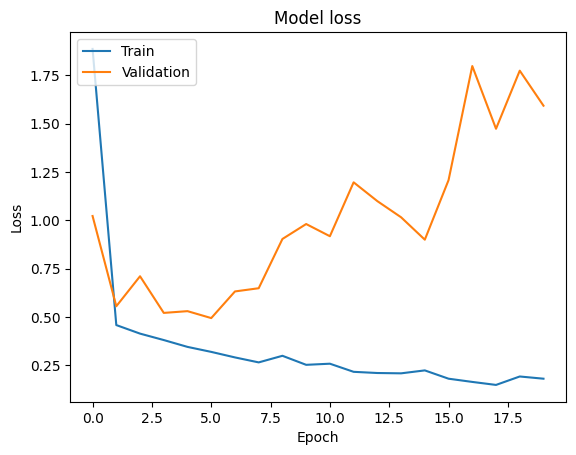

In [ ]:
plot_history(histroy)

# AUC curve for binary classification

In [ ]:
predicted_array=np.argmax(Test_predictions,axis=-1)
print(predicted_array)

[1 1 1 ... 1 1 1]


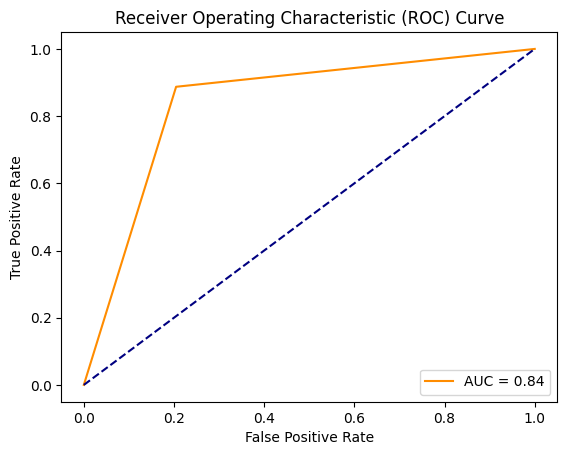

In [ ]:
# Compute the false positive rate (fpr), true positive rate (tpr), and threshold values for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test,predicted_array)

# Compute the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

`y_test` is a list of true labels for a binary classification problem (0 or 1), and `predicted_array` is a list of predicted scores for each sample.

The `roc_curve` function from Scikit-learn is used to calculate the false positive rate (`fpr`), true positive rate (`tpr`), and threshold values for the ROC curve. The `auc` function is then used to calculate the AUC score.

Finally, the ROC curve is plotted using the `plt.plot` function, with the false positive rate on the x-axis and the true positive rate on the y-axis. The `plt.plot` function is also used to plot the diagonal line (`[0, 1], [0, 1]`) to indicate random guessing, and to add labels and a legend to the plot.

#للتذكير

-true positive : 

بأختصاء هى صورة كان المفروض تتنبأ بيها وتنبأت بيها صح 

So true positive rate :

هو معدل تنبأ المودل بالصور اللى المفروض يتنبأ بيها وتنبأ بيها صح

-false positive :

بأختصاء هى صورة كان المفروض تتنبأ بيها وتنبأت بيها غلط
 
So false positive rate :

هو معدل تنبأ المودل بالصور اللى المفروض يتنبأ بيها وتنبأ بيها غلط

##Transfer Learning model

In [ ]:
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
OPTIMIZER =Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
base_model=tf.keras.applications.Xception(
    include_top=False,
    weights="imagenet",
    input_shape=(100,100,3),
    classifier_activation="softmax",
)
    
base_model.trainable = True

x=base_model.output

x=GlobalAveragePooling2D()(x)

predictions=Dense(1, activation='sigmoid',name='Final')(x) 
model_1=Model(inputs=base_model.input , outputs=predictions)

#model.Load_weights(dire)

model_1.compile(loss='binary_crossentropy',optimizer=OPTIMIZER,metrics=['accuracy',keras.metrics.Precision(),keras.metrics.Recall()])

In [ ]:
def get_callbacks (model_name):
    callbacks =[]
    checkpoint = tf.keras.callbacks. ModelCheckpoint (filepath=f'model. {model_name}. h5', 
                                                      verbose=1, monitor='val_loss', mode='min')
    callbacks.append(checkpoint)
    anne = ReduceLROnPlateau (monitor = 'val_loss', factor=0.5, patience=5, verbose=2,
                        min_lr=0.0000001,min_delta=0.00001 ,mode='auto' )
    callbacks.append(anne)
    early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=10,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)
   # earlystop = tf.keras.callbacks.arlyStopping(monitor='val_loss', patience=10) 
    callbacks.append(early_stopping)
    return callbacks
callbacks = get_callbacks('VGG16')
history2=model.fit( X_train,y_train, epochs=10, validation_data= [X_test,y_test],callbacks=[callbacks])

Epoch 1/10
156/157 [============================>.] - ETA: 0s - loss: 0.2397 - accuracy: 0.9145
Epoch 1: saving model to model. VGG16. h5


157/157 [==============================] - 13s 59ms/step - loss: 0.2394 - accuracy: 0.9146 - val_loss: 1.2492 - val_accuracy: 0.8190 - lr: 0.0010
Epoch 2/10
157/157 [==============================] - ETA: 0s - loss: 0.2567 - accuracy: 0.9138
Epoch 2: saving model to model. VGG16. h5


157/157 [==============================] - 5s 32ms/step - loss: 0.2567 - accuracy: 0.9138 - val_loss: 0.7303 - val_accuracy: 0.8480 - lr: 0.0010
Epoch 3/10
154/157 [============================>.] - ETA: 0s - loss: 0.2229 - accuracy: 0.9205
Epoch 3: saving model to model. VGG16. h5


157/157 [==============================] - 4s 28ms/step - loss: 0.2225 - accuracy: 0.9206 - val_loss: 0.5573 - val_accuracy: 0.8263 - lr: 0.0010
Epoch 4/10
154/157 [============================>.] - ETA: 0s - loss: 0.2248 - accuracy: 0.9117
Epoch 4: saving model to model. VGG16. h5


157/157 [==============================] - 4s 28ms/step - loss: 0.2250 - accuracy: 0.9114 - val_loss: 1.0304 - val_accuracy: 0.8417 - lr: 0.0010
Epoch 5/10
153/157 [============================>.] - ETA: 0s - loss: 0.1339 - accuracy: 0.9491
Epoch 5: saving model to model. VGG16. h5


157/157 [==============================] - 4s 23ms/step - loss: 0.1344 - accuracy: 0.9486 - val_loss: 1.3871 - val_accuracy: 0.8583 - lr: 0.0010
Epoch 6/10
154/157 [============================>.] - ETA: 0s - loss: 0.1259 - accuracy: 0.9554
Epoch 6: saving model to model. VGG16. h5


157/157 [==============================] - 4s 23ms/step - loss: 0.1257 - accuracy: 0.9552 - val_loss: 2.0949 - val_accuracy: 0.8570 - lr: 0.0010
Epoch 7/10
157/157 [==============================] - ETA: 0s - loss: 0.1751 - accuracy: 0.9350
Epoch 7: saving model to model. VGG16. h5


157/157 [==============================] - 4s 28ms/step - loss: 0.1751 - accuracy: 0.9350 - val_loss: 2.0545 - val_accuracy: 0.8397 - lr: 0.0010
Epoch 8/10
155/157 [============================>.] - ETA: 0s - loss: 0.1472 - accuracy: 0.9433
Epoch 8: saving model to model. VGG16. h5



Epoch 8: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
157/157 [==============================] - 4s 25ms/step - loss: 0.1464 - accuracy: 0.9436 - val_loss: 1.9675 - val_accuracy: 0.8537 - lr: 0.0010
Epoch 9/10
157/157 [==============================] - ETA: 0s - loss: 0.0790 - accuracy: 0.9716
Epoch 9: saving model to model. VGG16. h5


157/157 [==============================] - 4s 25ms/step - loss: 0.0790 - accuracy: 0.9716 - val_loss: 1.5025 - val_accuracy: 0.8570 - lr: 5.0000e-04
Epoch 10/10
154/157 [============================>.] - ETA: 0s - loss: 0.0469 - accuracy: 0.9813
Epoch 10: saving model to model. VGG16. h5


157/157 [==============================] - 4s 28ms/step - loss: 0.0473 - accuracy: 0.9810 - val_loss: 1.6472 - val_accuracy: 0.8690 - lr: 5.0000e-04


In [ ]:
import imageio
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from skimage.transform import resize
from IPython.display import HTML

def display_video(video):
    fig = plt.figure(figsize=(3,3))  #Display size specification

    mov = []
    for i in range(len(video)):  #Append videos one by one to mov
        img = plt.imshow(video[i], animated=True)
        plt.axis('off')
        mov.append([img])

    #Animation creation
    anime = animation.ArtistAnimation(fig, mov, interval=50, repeat_delay=1000)

    plt.close()
    return anime

In [ ]:
video = imageio.mimread('/content/drive/MyDrive/my-hero.mp4')  #Loading video
#video = [resize(frame, (256, 256))[..., :3] for frame in video]    #Size adjustment (if necessary)
HTML(display_video(video).to_html5_video())  #Inline video display in HTML5

#شكرا لصبر حضرتك علينا طول المناقشة 🌸

#Don't have a good day , have a great day